In [71]:
#setup matplotlib to plot inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
heart_disease= pd.read_csv("heart-disease.csv")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Comme notre variable cible est une catégorie (maladie cardiaque ou non), c’est quoi le type de
problème de ML qu’on doit résoudre ?

=> Il s'agit d'unp probleme de classification

In [73]:
#create X (all colonne except target)
X=heart_disease.iloc[:,:-1]

#create Y (only the target colum)
y= heart_disease.iloc[:,-1:]


In [74]:
# import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

#use train_test_split to spllit X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#View the differnet shapes of the training and test datasets

In [75]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [76]:
y_train

,target
124,1
72,1
15,1
10,1
163,1
...,...
188,0
71,1
106,1
270,0


In [77]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3


In [78]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
250,0
19,1
143,1
79,1


In [79]:
#Import the RandomForestClasssifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier(max_depth=2, random_state=0)

3. Ajuster le modèle et faire des prédictions :

In [80]:
clf.fit(X_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_12884\2395142735.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [81]:
y_preds= clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1], dtype=int64)

4. Évaluer les prédictions du modèle :

In [83]:
#Evaluate the fitted model on the training set using the score() function
clf.score(X_train,y_train)

0.8867924528301887

In [85]:
#Evaluate the fitted model on the test set using the score() function
clf.score(X_test,y_test)

0.8571428571428571

Expérimenter différents modèles de classification

In [86]:
#Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

instancier un modèle dans un dictionnaire

In [90]:
exemple_dic={"RandomForestClassifier":RandomForestClassifier()}

dict= {"LinearSVC": LinearSVC() ,
        "KNN":KNeighborsClassifier() ,
        "SVC": SVC(),
        "LogisticRegression":LogisticRegression(),
        "RandomForestClassifier":RandomForestClassifier()}

In [91]:
#Create an empty Dictionnaire named results
results ={}

In [93]:
#loop  through the models dictionary items,fitting the model on the training data
#and appending the model name and model score on the test data to the results dictionary
for model_name,model in dict.items():
  model.fit(X_train,y_train)
  results[model_name]=model.score(X_test,y_test)

#view the reults
results

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

{'LinearSVC': 0.6703296703296703,
 'KNN': 0.6593406593406593,
 'SVC': 0.7032967032967034,
 'LogisticRegression': 0.8131868131868132,
 'RandomForestClassifier': 0.8241758241758241}

==> On remarque que le model le mieux fonctionné est LogisticRegression

==> on constate bien l'excution de cellule ci-dissus plusieurs fois gener des resultats differents
En raison du caractère aléatoire de la façon dont chaque modèle trouve des modèles dans les
données, vous remarquerez peut-être des résultats différents à chaque fois.
Sans définir manuellement l'état aléatoire à l'aide du paramètre random_state de certains
modèles ou en utilisant NumPy random seed, chaque fois que vous exécutez la cellule, vous
obtiendrez des résultats légèrement différents.


In [97]:
results_df= pd.DataFrame(results.items(),columns=["Model","Score"])

results_df

,Model,Score
0,LinearSVC,0.670330
1,KNN,0.659341
2,SVC,0.703297
3,LogisticRegression,0.813187
4,RandomForestClassifier,0.824176


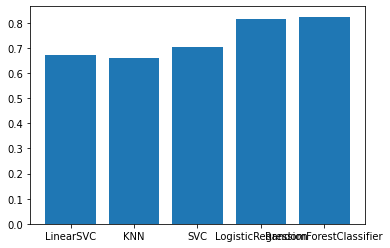

In [100]:
#create a barplot of the results dataFrame using plot.bar
plt.bar(results_df["Model"], results_df["Score"])
plt.show()

In [101]:
#Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4,4,20), "solver":["liblinear"]}

In [ ]:
np.re